# Генерація дерев

- Умови діріхлет із нулем на всіх границях
    - Прикладове дерево, котре генерувалося 8 годин
    - Такі самі дерева, в геометрії 1 на 1 і dx змінюємо від 0 до 1 із якимись кроком
    - Такі самі дерева, в геометрії 4 на 4 і dx змінюємо від 0 до 4 із якимись кроком
    - Такі самі дерева, в геометрії 4 на 20 і dx змінюємо від 0 до 4 із якимисьм кроком
    - Кругла геометрія із діаметром 2.
    - Кругла геометрія із діаметром 5.
 - Умови діріхлета, але з вільними умовами на границі
 - Умови лапласа
 - Для різних значеннь тета
 - Для різних значеннь порогу біфуркації
 - І все те саме тільки для статистичної біфуркації.

 Сумарно виходить десь біля 100 різних симуляцій..

 Візьмемо параметри із 8годинної моделі, оскільки я їх обговорював із Петром:

 - мінімальна відстань біфуркації - 0.01. Але це значення було все ж за великим, адже не гістограмі було видно, що в якийсь момент воно вперлося в цю межу. тому візьмемо 0.005.
 - крок симуляції теж візьмемо 0.005
 - мінімальну відстань росту так само 0.005

 тепер, що до інших чисельних параметрів:
 - квадратура може нехай буде 4и. 
 - додамо все ж одну адптацію сітки.

 Чисельні параметри сітки:
 - довжина ігнорування згладження - 0.02
 - кут згладження - 0.2


In [ ]:
import riversimdefs as rs

## Умови діріхлет із нулем на всіх границях

### Дерева в геометрії 1 на 1 і dx змінюємо від 0 до 1 із достатньо малим кроком

basic_combinations__boundary_cond=dirichlet__width=1.0__heigth=1.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx=0.03__bifurcation_threshold=-0.2
0
10
20
30
40
50
60
70
80
90
100

basic_combinations__boundary_cond=laplacea__width=1.0__heigth=1.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx=0.03__bifurcation_threshold=-0.2
0
10
20
30
40
50
60
70
80
90
100

basic_combinations__boundary_cond=dirichlet__width=5.0__heigth=1.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx=0.03__bifurcation_threshold=-0.2
0
10
20
30
40
50
60
70
80
basic_combinations__boundary_cond=laplacea__width=5.0__heigth=5.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx=0.03__bifurcation_threshold=-0.2
0
10
20
30
40
50
60
70
80
basic_combinations__boundary_cond=dirichlet__width=20.0__heigth=5.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx=0.03__bifurcation_threshold=-0.2
0
10
20
30
40
50
60
basic_combinations__boundary_cond=laplacea__width=20.0__heigth=20.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx

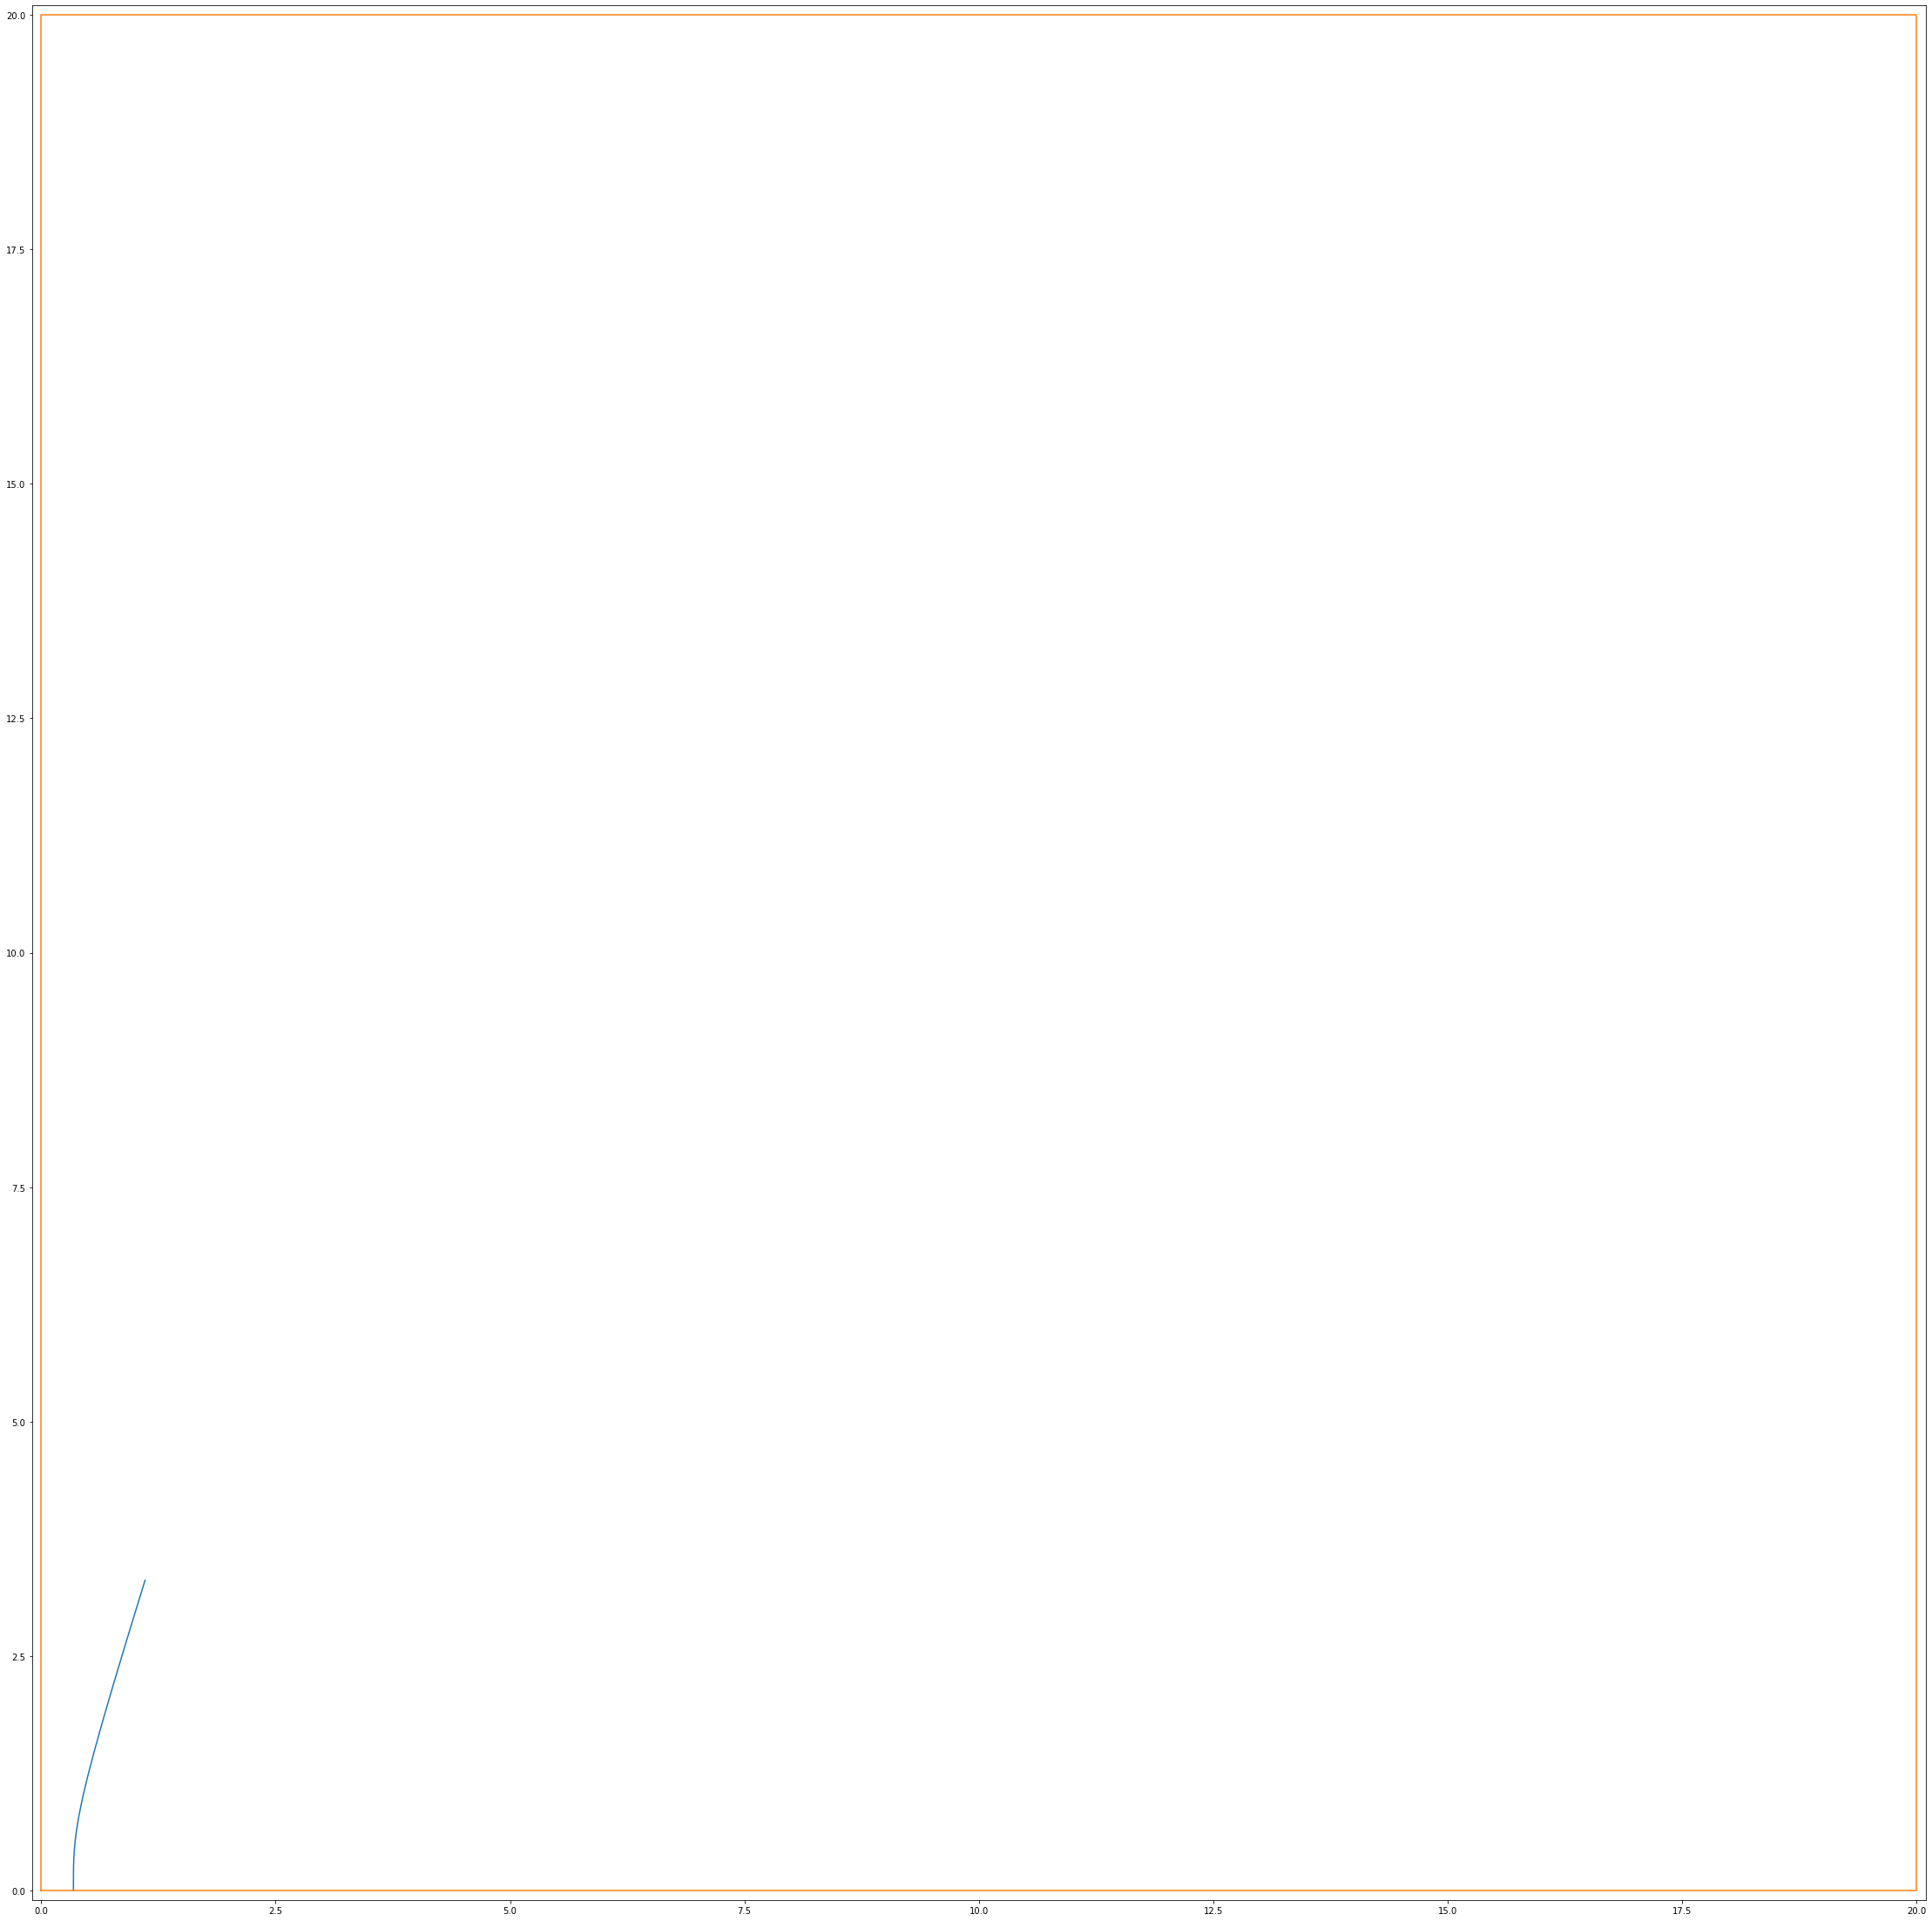

In [2]:
import riversimdefs as rs
import numpy as np

model = rs.Model()

name_prefix = "basic_combinations"
model.growth_type = 1
model.growth_threshold = 0.0005#0.0001
model.mesh_params.ignored_smoothness_length = 0.01
model.mesh_params.smoothness_degree = 0.1
model.solver_params.adaptive_refinment_steps = 0#1
model.solver_params.quadrature_degree = 3#4

model.number_of_steps = 400
model.ds = 0.01#0.007

outputs = {}
ddx = (model.width / 2. -model.integr_params.integration_radius) / 3.
for model.dx in np.arange(model.integr_params.integration_radius, model.width / 2., ddx):
    for model.bifurcation_threshold in np.arange(-0.2, 0.2, 0.2):
        for model.eta in np.arange(0., 2., 0.5):
            for model.width in [1., 5., 20.]:
                for boundary_cond_type in ["dirichlet", "laplacea"]:
                    key = name_prefix +"__boundary_cond=" + boundary_cond_type + "__width=" + str(model.width) + "__heigth=" + str(model.height) + "__ds="+str(model.ds) + "__bifurcation_min_dist=" + str(model.bifurcation_min_dist) + "__eta=" + str(model.eta) + "__dx=" + str(model.dx) + "__bifurcation_threshold=" + str(model.bifurcation_threshold)
                    print(key)

                    model.height = model.width
                    if boundary_cond_type == "dirichlet":
                        model.initializeDirichlet()
                    elif boundary_cond_type == "laplacea":
                        model.initializeLaplace()
                    model.rivers[1].addPoint(rs.Polar(model.integr_params.integration_radius, 0), model.region_params.river_boundary_id)
                    try:
                        outputs[key] = rs.growRiver(model, plot_period = 50, debug = False)
                    except:
                        print("catched error.")
                        break

                    rs.save(model, key + ".json")

In [ ]:
print(3*3*5*3*2)

1200
270


In [3]:
outputs

{'basic_combinations__boundary_cond=dirichlet__width=1.0__heigth=1.0__ds=0.01__bifurcation_min_dist=0.05__eta=0.0__dx=0.03__bifurcation_threshold=-0.2': {'bound_gen_t': array([-8.63075256e-05, -1.83582306e-05, -2.24113464e-05, -2.43186951e-05,
         -2.31266022e-05, -1.81198120e-05, -2.09808350e-05, -2.69412994e-05,
         -2.00271606e-05, -2.21729279e-05, -3.00407410e-05, -2.28881836e-05,
         -2.31266022e-05, -3.45706940e-05, -3.38554382e-05, -3.17096710e-05,
         -5.81741333e-05, -2.45571136e-05, -2.90870667e-05, -3.56197357e-04,
         -6.68048859e-04, -7.62224197e-04, -5.01394272e-04, -1.09052658e-03,
         -7.86542892e-04, -6.61611557e-04, -4.95910645e-04, -7.29560852e-05,
         -1.52826309e-04, -3.47852707e-04, -1.91569328e-03, -3.82661819e-04,
         -3.09944153e-05, -8.70227814e-05, -2.37226486e-03, -3.82423401e-04,
         -2.38013268e-03, -8.27074051e-04, -5.73873520e-04, -5.77449799e-04,
         -8.39948654e-04, -2.31504440e-04, -5.08546829e-04, -5.

In [6]:
import riversimdefs as rs
import numpy as np

model = rs.Model()

model.growth_type = 1
#model.growth_min_distance = 0.005
#model.growth_threshold = 0.0001
model.mesh_params.ignored_smoothness_length = 0
model.mesh_params.smoothness_degree = 0.01
#model.solver_params.adaptive_refinment_steps = 1
#model.solver_params.quadrature_degree = 4

model.number_of_steps = 240

#model.ds = 0.005
#model.bifurcation_min_dist = 0.005
#model.width = 1.
#model.height = 1.
#model.eta = 1.

outputs = {}
for model.integr_params.integration_radius in np.arange(0.01, 0.1, 0.03):
    for model.integr_params.weigth_func_radius in np.arange(0.01, 0.1, 0.03):
        key = "new_integr_radius_" + str(model.integr_params.integration_radius) + "weight_rad_" + str(model.integr_params.weigth_func_radius)
        print(key)

        model.initializeDirichlet()
        model.rivers[1].addPoint(rs.Polar(model.integr_params.integration_radius, 0), model.region_params.river_boundary_id)
        try:
            outputs[key] = rs.growRiver(model, plot_period = 25, debug = False)
        except:
            print("catched error.")
            break
    
        rs.save(model, key + ".json")

new_integr_radius_0.01weight_rad_0.01
0
10
new_integr_radius_0.01weight_rad_0.04
0
10
20
new_integr_radius_0.01weight_rad_0.06999999999999999
0
10


In [1]:
import riversimdefs as rs

model = rs.Model()
rs.open(model, "debug 210.json")
model.rivers.removeTipPoints()
rs.plot(model, plot_limits=[0.6, 0.7, 0.6, 0.7])

boundary = rs.BoundaryGenerator(model.sources, model.region, model.rivers, model.region_params)

rs.NumOfBoundaryIntersection(boundary, model.rivers.tipBoundary())
model.number_of_steps = 2
rs.growRiver(model)

0
